In [37]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,))) # 차원이 784로 되어 있는 2D tensor를 입력으로 받아, 32 차원인 2D 텐서로 출력  
model.add(layers.Dense(10))                     # input_shape를 지정해 주지 않아도, keras는 알아서 setting 해 줌

In [27]:

# sequential 클래스 vs 함수형 API
# 1. sequential 클래스
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,))) # 차원이 784로 되어 있는 2D tensor를 입력으로 받아, 32 차원인 2D 텐서로 출력  
model.add(layers.Dense(10))                     # input_shape를 지정해 주지 않아도, keras는 알아서 setting 해 줌

# 같은 모델을 함수형 API로 제작
input_tensor = layers.Input(shape=(784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs = input_tensor, outputs=output_tensor)

In [28]:
# 하나의 손실 함수를 사용하는 가장 흔한 경우의 예
from keras import optimizers
model.compile(
    optimizer = optimizers.RMSprop(lr = 0.001), # 모델이 사용할 optimizer : Root mean square prop
    loss = 'mse',                               # 손실 함수  : mean square error 
    metrics=['accuracy']                        # 측정 지표 : 정확도
             )

In [29]:
# fit 함수를 이용하여 학습 과정이 이루어짐
model.fit(input_tensor, target_tensor, batch_size = 128, epochs = 10)

NameError: name 'target_tensor' is not defined

In [30]:
# 이진 분류 문제 수행해보기
# ** IMDB 데이터셋
# 인터넷 영화 DB로부터 가져온 양극단의 리뷰 5만 개로 이루어진 IMDB 데이터셋 사용
# 데이터셋은 훈련 데이터 25000개와 테스트 데이터 25000 개
# 각각 50%는 부정, 50%는 긍정 리뷰로 구성
# 부정 : 0, 긍정 : 1
# 케라스에 포함되어 있음
# 각 리뷰가 숫자 시퀀스로 변환되어 있음
# 각 숫자는 사전에 있는 고유한 단어를 나타냄

In [1]:
# 데이터셋 로드
# num_words -> 단어 1만개만 사용하겠다는 의미. 드물게 나타나는 단어는 무시
# 
import numpy as np
old = np.load                                        
np.load = lambda *a,**k:old(*a, allow_pickle = True, **k)
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [ ]:
# train_data sample 01 에서 10개의 시퀀스 확인
train_data[1:10] # 10개의 sample 추출해보기

In [25]:
# sample_01 의 label 값이 1임을 확인
train_labels[0]

1

In [27]:
# 가장 많이 나오는 단어 1만개로 제한했기 때문에, 단어 인덱스는 9999를 넘지 않음
max([max(sequence) for sequence in train_data])

9999

In [28]:
# 리뷰 데이터 하나를 원래 영어 단어로 어떻게 바꾸는지 보자~
word_index         = imdb.get_word_index() # 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review     = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [33]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [34]:
# 데이터 준비
# 신경망에 숫자 리스트를 주입할 수 없음
# 리스트를 텐서로 바꾸는 두 가지 방법이 있음

In [49]:
# 이번 방법은 직접 데이터를 one-hot vector로 변환
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))   # 크기가 (len(sequences), dimension) 이고, 모든 원소가 0인 행렬을 만듬
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1,                     # results[i]에서 특정 인덱스의 위치의 값을 1로 변경
    return results

x_train = vectorize_sequences(train_data)  # train_data, test_data 를 one-hot vector로 변경
x_test = vectorize_sequences(test_data)

In [16]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
# 중간에 있는 은닉 층은 relu를 사용하고, 마지막 층은 확률을 출력하기 위해 시그모이드 함수 사용
# 신경망 구현
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# 손실함수와 옵티마이저 설정
# 이진 분류이므로, cross entropy 사용!
model.compile(
    optimizer = 'rmsprop',
    loss      = 'binary_crossentropy',
    metrics   = ['accuracy'] # acc도 가능
)

# 만약 직접 만든 손실함수나 옵티마이저를 넣고 싶을 때는 직접 함수 객체를 할당

In [29]:
# 훈련 검증
# 모델의 정확도를 측정하기 위해서는 10000개의 샘플 데이터를 떼어 검증 세트를 만들어야 함
x_val           = x_train[:10000]
partial_x_train = x_train[10000:]
y_val           = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# 512개씩(배치 데이터) 20번의 에포크 동안 훈련시키자.
# validation_data 매개변수에 검증 데이터를 전달 해야함

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)


In [31]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

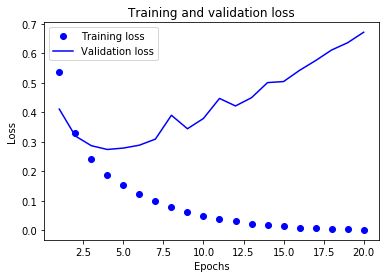

In [33]:
# 훈련과 검증 loss 값 plot 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss         = history_dict['loss']
val_loss     = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

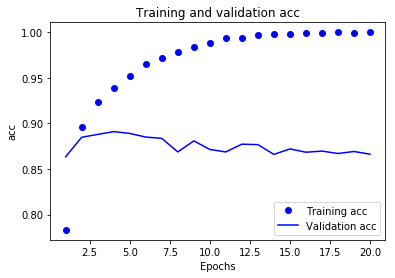

In [34]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc     = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()

In [ ]:
# PLOT 결과
# train dataset의 acc를 보면, Epoch 가 증가할수록, 정확도가 증가하는 것을 볼 수 있지만,
# overfitting 떄문에 한 4 epoch 부터 검증 데이터의 정확도는 감소하는 것을 볼 수 있음
# 4번만 epoch를 하면 최적 학습 시간이라는 것을 알 수 있음!
# 최고 수준의 기법을 이용하면 95%에 가까운 성능을 가질 수 있음

In [36]:
# 훈련된 모델로 새로운 데이터에 대해 예측하기
model.predict(x_test)

array([[0.00292429],
       [1.        ],
       [0.9974374 ],
       ...,
       [0.0042876 ],
       [0.05636954],
       [0.7187229 ]], dtype=float32)

In [16]:
# 뉴스 기사 분류 : 다중 분류 문제
# 로이터 데이터셋 로드하기


In [1]:
from keras.datasets import reuters
import numpy as np
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000) # 단어는 1만개로 제한! 

Using TensorFlow backend.


In [2]:
# train : test --> 약 8:2
print("train_data  %s" %(len(train_data)))
print("test_data  %s" %(len(test_data)))

train_data  8982
test_data  2246


In [2]:
# 데이터 인코딩
# 이번 방법은 직접 데이터를 one-hot vector로 변환
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))   # 크기가 (len(sequences), dimension) 이고, 모든 원소가 0인 행렬을 만듬
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1,                     # results[i]에서 특정 인덱스의 위치의 값을 1로 변경
    return results

x_train = vectorize_sequences(train_data)  # train_data, test_data 를 one-hot vector로 변경
x_test = vectorize_sequences(test_data)

In [3]:
from keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels  = to_categorical(test_labels)

In [6]:
# 레이블도 벡터로 변경(이번에는 다중 분류이기 때문! 영화리뷰분류와는 다름을 주의!)
# 왜 실행이 안되는지 확인 필요
def to_one_hot(labels, dimension = 46):
    results = np.zeros(len(labels), dimension)
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

TypeError: data type not understood

In [4]:
# 모델 구성
# hidden node 의 개수 증가 16 -> 64개
# information bottleneck 현상을 방지하기 위함
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax')) # 마지막 층의 크기는 46 -> label 개수

W0708 20:39:47.076437 13860 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 20:39:47.097720 13860 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 20:39:47.102699 13860 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.compile(
    optimizer = 'rmsprop',
    loss      = 'categorical_crossentropy', # label 개수가 46개이므로, 가장 적합한 categorical cross entropy 사용
    metrics   = ['accuracy'] # acc도 가능
)

W0708 20:39:49.755443 13860 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0708 20:39:49.785731 13860 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
# 훈련 검증
# 훈련 데이터에서 1000개의 샘플을 따로 떼어서 검증 세트로 사용
x_val           = x_train[:1000]
partial_x_train = x_train[1000:]
y_val           = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
# 20번의 에포크로 모델 훈련
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

W0708 20:41:22.478507 13860 deprecation.py:323] From C:\Users\koni1\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0708 20:41:22.570259 13860 deprecation_wrapper.py:119] From C:\Users\koni1\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 248us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7204 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 181us/step - loss: 1.4450 - acc: 0.6878 - val_loss: 1.3457 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 166us/step - loss: 1.0951 - acc: 0.7648 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.8695 - acc: 0.8161 - val_loss: 1.0795 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.7032 - acc: 0.8480 - val_loss: 0.9846 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.5665 - acc: 0.8795 - val_loss: 0.9409 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.4580 - acc: 0.9049 - val_loss: 0.9074 - val_acc: 0.8010


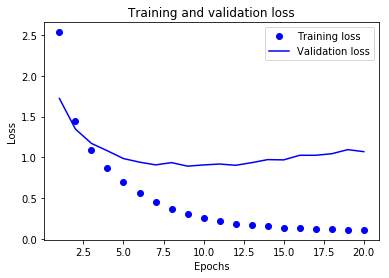

In [11]:
# 훈련과 검증 loss 값 plot 그리기
import matplotlib.pyplot as plt

# history_dict = history.history
loss         = history.history['loss']
val_loss     = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

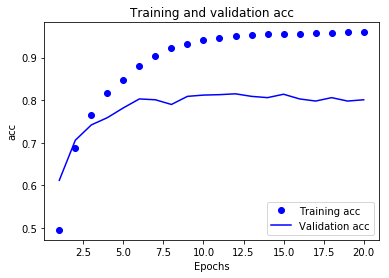

2246/2246 [==============================] - 0s 178us/step


In [13]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc     = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()
# 결과적으로 epoch가 9에서 과대적합이 일어남
# -> epoch가 9인 값에서 새로운 모델을 훈련하고 테스트 세트에서 평가하는 것이 가장 적합!

results = model.evaluate(x_test, one_hot_test_labels)

In [15]:
# 대략 78%의 정확도 달성!
results 

[1.2122426994761928, 0.778717720444884]

In [21]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

# predictions 는 길이가 46인 vector
predictions[0].shape

# 하나의 벡터의 합은 1
np.sum(predictions[0])

# 가장 큰 값이 예측 클래스가 됨
np.argmax(predictions[0])

3

In [23]:
# 레이블과 손실을 다루는 다른 방법
y_train = np.array(train_labels)
y_test  = np.array(test_labels) 

In [24]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [25]:
# 3.6 주택 가격 예측: 회귀 문제
# 보스턴 주택 가격 데이터셋
# 1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때
# 주택 가격의 중간 값을 예측.
# 데이터 포인트 : 506개
# train : 404, test : 102
# ** 입력 데이터의 feature는 scale이 다름

In [26]:
# 보스턴 주택 데이터셋 로드
from keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 1s 19us/step


In [29]:
train_data.shape

(404, 13)

In [31]:
test_data.shape

(102, 13)

In [32]:
# 가격은 일반적으로 1만달러 ~ 5만달러 사이로 구성되어 있음

In [46]:
# 정규화 수행
mean = train_data.mean(axis = 0)
train_data -= mean
std  = train_data.std(axis = 0)
train_data /= std

# 중요! test_data도 train의 mean과 std를 이용해서 변환 수행
test_data -= mean
test_data /= std

In [47]:
# 모델 구성
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1)) # 마지막 층의 크기는 1 -> 회귀이기 때문에 단일 스칼라 값을 return
    model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mse'])
    return model

In [48]:
# K-fold 검증 수행
import numpy as np
k = 4                                                        # 4겹 검증 수행할 예정 k = 4
num_val_samples = len(train_data) // k                       # 기존 train_data를 4등분한 nrow 개수 계산
num_epochs = 100                                             #  epcch 수 100 -> 데이터가 적으므로..
all_scores = []                                             # 최종 4차원의 score 값 저장
for i in range(k):
    print("처리중인 폴드 #",  i)
    val_data    = train_data[i * num_val_samples: (i + 1) * num_val_samples]     # train_data의 검증 데이터 편성
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]  # train_targets의 검증 레이블 편성
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples]
         , train_data[(i + 1) * num_val_samples:]], # 검증 데이터 부분을 제외한 나머지 부분을 train Data로 편성
        axis = 0
    )
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples]
         , train_labels[(i + 1) * num_val_samples:]], # 검증 데이터 부분을 제외한 나머지 부분을 train Data로 편성
        axis = 0
    )
    
    model = build_model()
    model.fit(
    
        partial_train_data,
        partial_train_targets,
        epochs = num_epochs,
        batch_size = 1, # batch_size는 데이터가 너무 작으므로, 1
        verbose = 0     # verbose 가 0이면, 훈련 과정이 출력 X
    )
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0) # val_targets -> 검증 세트로 모델 평가
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [44]:
all_scores

[9.081567292166229, 18.363967074025975, 17.224740679901426, 12.070849345462157]

In [45]:
np.mean(all_scores)

14.185281097888948

In [ ]:
# 신경망을 좀 더 오래 500 에포크 동안 훈련해보고,
# 각 에포크마다 모델이 얼마나 개선되었는지 기록하기 위해 훈련 루프를 조금 수정해서 에포크 검증 점수를 로그에 저장해보자
# 해당 값을 PLOT으로 확인해보면, 각 에포크에 대한 평균 MAE 값들의 변동폭이 크고, 초반 MAE 값이 너무 커 PLOT을 보기 어려우므로,
# 처음 5개의 값을 절삭하고, 나머지 데이터를 가지고 지수이동평균으로 대체해보자